In [1]:
#引入必要的库文件
from skimage import data,img_as_float
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from keras import utils as np_utils
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['CUDA_VISIBLE_DEVICES']='1'

Using TensorFlow backend.


In [2]:
#引入搭建网络的库
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras import initializers

In [3]:
model=Sequential()
model.add(Reshape((14,14,1),input_shape=(14,14)))
model.add(Conv2D(16,(2,2),activation='relu',padding='SAME'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(2,2),activation='relu',padding='SAME'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
#查看存储的文件
data128=pd.read_csv('04/gen_data128.csv',header=None)
data128=np.array(data128)
label=pd.read_csv('03/label.csv',header=None)
label=np.array(label)

#读取14*14图像数据
data_qso_u=np.load('02/qso_u_img.npy')
data_qso_u=np.array(data_qso_u)
data_star_u=np.load('02/star_u_img.npy')
data_star_u=np.array(data_star_u)

data_qso_g=np.load('02/qso_u_img.npy')
data_qso_g=np.array(data_qso_u)
data_star_g=np.load('02/star_u_img.npy')
data_star_g=np.array(data_star_u)

data_qso_r=np.load('02/qso_r_img.npy')
data_qso_r=np.array(data_qso_r)
data_star_r=np.load('02/star_r_img.npy')
data_star_r=np.array(data_star_r)

# data_qso=np.array(data_qso)
# data_star=np.array(data_star)
# data_all=np.concatenate((data_qso,data_star),axis=0)

In [52]:
print(data128[0])

[0.9794333  0.02324101 0.96885365 0.97616446 0.96473289 0.02388754
 0.97022498 0.03326529 0.02133352 0.02506563 0.98578823 0.9961431
 0.98717552 0.02007636 0.04356444 0.98117423 0.0336833  0.02149111
 0.97797972 0.99599671 0.96961224 0.97798848 0.01010996 0.02343041
 0.023141   0.00145686 0.02695763 0.0240593  0.98826426 0.02218646
 0.0154326  0.00390238 0.01842225 0.9583528  0.95775867 0.99348176
 0.03729209 0.02653545 0.01509658 0.02333081 0.01439545 0.97780287
 0.01880732 0.0215098  0.97108722 0.97602135 0.0163722  0.98012447
 0.01658717 0.98876619 0.98486483 0.97727013 0.99378556 0.02709481
 0.97466493 0.98416698 0.97615981 0.99158132 0.02098498 0.02151608
 0.9786945  0.99140334 0.0319356  0.97732365 0.01790419 0.9863019
 0.02010596 0.99176085 0.98700243 0.01641273 0.0206019  0.99355066
 0.03044811 0.99041653 0.00493991 0.98564541 0.97697508 0.03409651
 0.01821598 0.0109016  0.99389017 0.98260611 0.02740905 0.96089232
 0.01774308 0.97812217 0.97666514 0.02149981 0.98633081 0.983355

In [4]:
data_qso=[]
for i in range(len(data_qso_u)):
    data_qso.append(data_qso_u[i])
    data_qso.append(data_qso_g[i])
    data_qso.append(data_qso_r[i])
data_qso=np.array(data_qso)
data_qso=data_qso.reshape((len(data_qso_u),14,14,3))
print(data_qso.shape)
# print(data_qso[0])

data_star=[]
for i in range(len(data_star_u)):
    data_star.append(data_star_u[i])
    data_star.append(data_star_g[i])
    data_star.append(data_star_r[i])
data_star=np.array(data_star)
data_star=data_star.reshape((len(data_star_u),14,14,3))
print(data_star.shape)

data_all=np.concatenate((data_qso,data_star),axis=0)
print(data_all.shape)

(16463, 14, 14, 3)
(8255, 14, 14, 3)
(24718, 14, 14, 3)


In [5]:
#数据归一化
def nom_flow(data):              
    for i in range(data.shape[0]):
            data[i]=(data[i]-data[i].min())/(data[i].max()-data.min())                     
nom_flow(data_all)

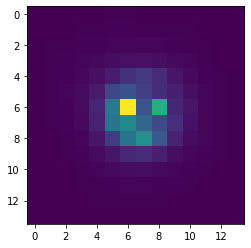

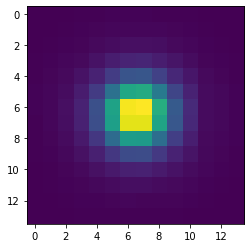

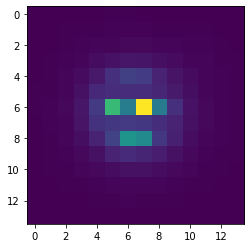

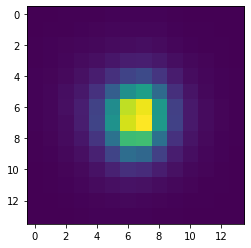

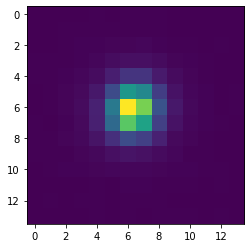

In [26]:
for i in range(5):
    plt.imshow(data_star[i])
    plt.show()

In [46]:
print(data128.shape)
print(data_all.shape)
print(label[1])

(24718, 128)
(24718, 14, 14, 3)
[1.]


In [6]:
#分割数据集
import sklearn.model_selection
from sklearn.model_selection import train_test_split
y = label
y= np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(data128, y,test_size = 0.4,random_state=5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_all, y,test_size = 0.4,random_state=5)

In [7]:
#实验加入光谱的图像分类模型
input_dims = 128 
auxiliary_input = Input(shape=(input_dims,),name='auxiliary_input')
main_inputs=Input(shape=(14,14,3),name='main_inputs')
'''
attention_probs = Dense(input_dims, activation='softmax', name='attention_probs')(inputs)
attention_mul = merge([inputs, attention_probs], output_shape=32, name='attention_mul', mode='mul')
'''
#x=concatenate([main_inputs,auxiliary_input])
#reshape = Reshape((128, 1), input_shape=(128,))(main_inputs)                         
dense1 =Dense(128,activation='relu')(auxiliary_input)
dropout1=Dropout(0.4)(dense1)
dense2 =Dense(64,activation='relu')(dropout1)
dropout2=Dropout(0.4)(dense1)
dense3 =Dense(32,activation='relu')(dropout2)
dropout3=Dropout(0.4)(dense1)
flatten =Flatten()(dropout3)
dense4 = Dense(16, activation='relu')(flatten)

res=Reshape((14,14,3))(main_inputs)
conv1=Conv2D(16,(2,2),activation='relu',padding='SAME')(res)
pool1=MaxPooling2D(2,2)(conv1)
conv2=Conv2D(32,(2,2),activation='relu',padding='SAME')(pool1)
pool2=MaxPooling2D(2,2)(conv2)
conv3=Conv2D(64,(2,2),activation='relu',padding='SAME')(pool2)
pool3=MaxPooling2D(2,2)(conv3)
picture=Flatten()(pool3)
pic256=Dense(128,activation='relu')(picture)

x=concatenate([dense1,pic256])
dense5 = Dense(64, activation='relu')(x)
dropout5 = Dropout(0.5)(dense5)
dense6 = Dense(2,activation = 'softmax')(dropout5)
model2 = Model(inputs = [auxiliary_input,main_inputs],outputs = dense6)
print(model2.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_inputs (InputLayer)        [(None, 14, 14, 3)]  0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 14, 14, 3)    0           main_inputs[0][0]                
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 16)   208         reshape[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 7, 7, 16)     0           conv2d[0][

In [36]:
import tensorflow as tf
#精确率评价指标
def metric_precision(y_true,y_pred): 
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
 TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
 FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
 FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
 precision=TP/(TP+FP)
 return precision
 
#召回率评价指标
def metric_recall(y_true,y_pred): 
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
 TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
 FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
 FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
 recall=TP/(TP+FN)
 return recall
 
#F1-score评价指标
def metric_F1score(y_true,y_pred): 
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
 TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
 FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
 FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
 precision=TP/(TP+FP)
 recall=TP/(TP+FN)
 F1score=2*precision*recall/(precision+recall)
 return F1score
 
# #编译阶段引用自定义评价指标示例
# model.compile(optimizer='adam',
#      loss='binary_crossentropy',
#      metrics=['accuracy',
#             metric_precision,
#             metric_recall,
#             metric_F1score])

In [26]:
#加载keras模块
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r^-',markersize=3.5, label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'go--',markersize=3.5, label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'bx-.',markersize=3.5, label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'ks:',markersize=3.5, label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right",bbox_to_anchor=(1.28, 1))
        plt.show()
history = LossHistory()

In [34]:
#配置模型
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import *
callbacks = [EarlyStopping(patience=3), CSVLogger('05/cnn.csv', append=True), 
             ModelCheckpoint('05/Restesst2.h5', save_best_only=True, save_weight_only = False)]
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-4, amsgrad=True), 
              metrics=['accuracy',metric_precision,metric_recall,metric_F1score])
hist = model2.fit([X_train,X_train1],y_train, epochs=20,validation_data = ([X_test,X_test1],y_test), workers=4, use_multiprocessing=True,
                      batch_size = 256,
                    callbacks=[history])

Train on 14830 samples, validate on 9888 samples
Epoch 1/20
14830/14830 [==============================] - 1s 74us/sample - loss: 0.0363 - acc: 0.9885 - metric_precision: 0.9885 - metric_recall: 0.9885 - metric_F1score: 0.9885 - val_loss: 0.0842 - val_acc: 0.9769 - val_metric_precision: 0.9770 - val_metric_recall: 0.9770 - val_metric_F1score: 0.9770
Epoch 2/20
14830/14830 [==============================] - 0s 33us/sample - loss: 0.0356 - acc: 0.9887 - metric_precision: 0.9888 - metric_recall: 0.9888 - metric_F1score: 0.9888 - val_loss: 0.0869 - val_acc: 0.9759 - val_metric_precision: 0.9759 - val_metric_recall: 0.9759 - val_metric_F1score: 0.9759
Epoch 3/20
14830/14830 [==============================] - 0s 33us/sample - loss: 0.0378 - acc: 0.9879 - metric_precision: 0.9879 - metric_recall: 0.9879 - metric_F1score: 0.9879 - val_loss: 0.0854 - val_acc: 0.9778 - val_metric_precision: 0.9778 - val_metric_recall: 0.9778 - val_metric_F1score: 0.9778
Epoch 4/20
14830/14830 [==================

Test score: 0.08822333408613059
Test accuracy: 0.97704285


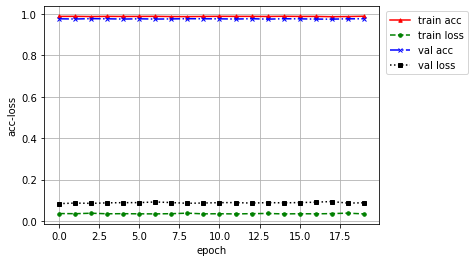

In [35]:
#模型评估
score = model2.evaluate([X_test,X_test1], y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
#绘制acc-loss曲线
history.loss_plot('epoch')